In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
connection = sql.connect('chinook.db')
connection

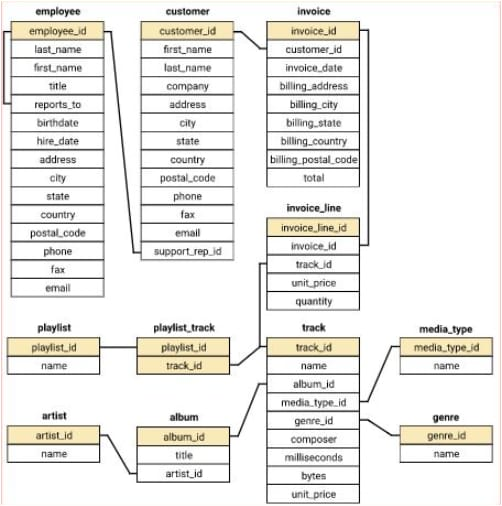

In [3]:
query = """
SELECT * FROM sqlite_master
WHERE type == 'table'
"""

pd.read_sql_query(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


### Class Task: Retrieve columns: Invoice_id = 1, Track_id, Track_name, Media_type_name, Quantity, Unit price

In [4]:
query = """
SELECT 
    invoice.invoice_id,
    invoice_line.track_id,
    track.name,
    track.unit_price,
    media_type.name,
    invoice_line.quantity
    
FROM invoice

JOIN invoice_line
ON invoice.invoice_id = invoice_line.invoice_id

JOIN track
ON invoice_line.track_id = track.track_id

JOIN media_type
ON track.media_type_id = media_type.media_type_id

WHERE invoice.invoice_id = 1
"""

pd.read_sql_query(query, connection)

,invoice_id,track_id,name,unit_price,name,quantity
0,1,1158,Right Next Door to Hell,0.99,Protected AAC audio file,1
1,1,1159,Dust N' Bones,0.99,Protected AAC audio file,1
2,1,1160,Live and Let Die,0.99,Protected AAC audio file,1
3,1,1161,Don't Cry (Original),0.99,Protected AAC audio file,1
4,1,1162,Perfect Crime,0.99,Protected AAC audio file,1
5,1,1163,You Ain't the First,0.99,Protected AAC audio file,1
6,1,1164,Bad Obsession,0.99,Protected AAC audio file,1
7,1,1165,Back off Bitch,0.99,Protected AAC audio file,1
8,1,1166,Double Talkin' Jive,0.99,Protected AAC audio file,1
9,1,1167,November Rain,0.99,Protected AAC audio file,1


### Class Task: Retrieve columns: album title, artist name, Total album sold

In [5]:
query = """
SELECT 
    album.title AS 'Album Title',
    artist.name AS 'Artist Name',
    SUM(invoice_line.quantity) AS 'Total Album Sold'
    
FROM album

JOIN artist
ON album.artist_id = artist.artist_id

JOIN track
ON album.album_id = track.album_id

JOIN invoice_line
ON track.track_id = invoice_line.track_id

GROUP BY album.title
ORDER BY 3 DESC
"""

pd.read_sql_query(query, connection)

,Album Title,Artist Name,Total Album Sold
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83
...,...,...,...
246,"Battlestar Galactica, Season 3",Battlestar Galactica,1
247,Bartok: Violin & Viola Concertos,Yehudi Menuhin,1
248,Bach: Goldberg Variations,Wilhelm Kempff,1
249,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso,1


### Class Task:

In [6]:
query = """
SELECT 
    first_name||" "||last_name AS Full_Name
FROM customer
"""

pd.read_sql_query(query, connection)

,Full_Name
0,Luís Gonçalves
1,Leonie Köhler
2,François Tremblay
3,Bjørn Hansen
4,František Wichterlová
5,Helena Holý
6,Astrid Gruber
7,Daan Peeters
8,Kara Nielsen
9,Eduardo Martins


### Task 13: Create a result set having the following columns: Country, City, Capital, Country Pop, Capital City Pop, and Capital City Pop %.

In [7]:
connection = sql.connect('factbook.db')
connection

In [15]:
query = """
SELECT 
    facts.name AS Country,
    cities.name AS City,
    cities.capital AS Capital,
    facts.population AS 'Country Pop',
    cities.population AS 'Capital City Pop',
    round((CAST(cities.population  AS FLOAT) / facts.population)*100, 2) AS 'Capital City Pop %'
    
FROM cities
LEFT JOIN facts
ON facts.id == cities.facts_id
WHERE cities.capital == 1
"""
pd.read_sql_query(query, connection)

,Country,City,Capital,Country Pop,Capital City Pop,Capital City Pop %
0,Aruba,Oranjestad,1,112162,37000,32.99
1,Antigua and Barbuda,Saint John'S,1,92436,27000,29.21
2,United Arab Emirates,Abu Dhabi,1,5779760,942000,16.30
3,Afghanistan,Kabul,1,32564342,3097000,9.51
4,Algeria,Algiers,1,39542166,2916000,7.37
...,...,...,...,...,...,...
203,Samoa,Apia,1,197773,37000,18.71
204,Swaziland,Mbabane,1,1435613,66000,4.60
205,Yemen,Sanaa,1,26737317,2419000,9.05
206,Zambia,Lusaka,1,15066266,1802000,11.96
